# Partitioning Training and Test Sets

In [2]:
# load the dataset
import pandas as pd
import numpy as np

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'hue', 'OD280/OD315 of diluted wines', 
                   'Proline']

print ('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# partition into training and test
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0, 
                                                    test_size=0.3, 
                                                    stratify=y) # ensures train and test have same class portions as original

## Feature Scaling

In [6]:
# normalizing the dataset using min-max scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train) # only fit on training data
X_test_norm = mms.transform(X_test)

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
# standardizing data features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # only fit on the training data
X_test_std = stdsc.transform(X_test)

/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Sparse Solutions with L1 Regularization
Because L1 regularization returns sparse feature vectors, we can use it for feature selection.

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0) # C is the inverse of the regularization parameter
lr.fit(X_train_std, y_train)

print ('Training Accuracy:', lr.score(X_train_std, y_train))
print ('Test Accuracy:', lr.score(X_test_std, y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zach/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
lr.intercept_ # returns intercepts for each class

array([-1.26352871, -1.21544839, -2.37044663])

In [14]:
lr.coef_ # returns an array of coefficients for each class

array([[ 1.24603861,  0.1804143 ,  0.74503549, -1.16259714,  0.        ,
         0.        ,  1.16495517,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55256701,  2.50957792],
       [-1.53954645, -0.38545575, -0.99592229,  0.36384548, -0.05886534,
         0.        ,  0.66703407,  0.        ,  0.        , -1.93144304,
         1.23882072,  0.        , -2.23292535],
       [ 0.1355948 ,  0.16873484,  0.35729486,  0.        ,  0.        ,
         0.        , -2.43728916,  0.        ,  0.        ,  1.56363088,
        -0.81840136, -0.49306439,  0.        ]])

In [15]:
import matplotlib.pyplot as plt

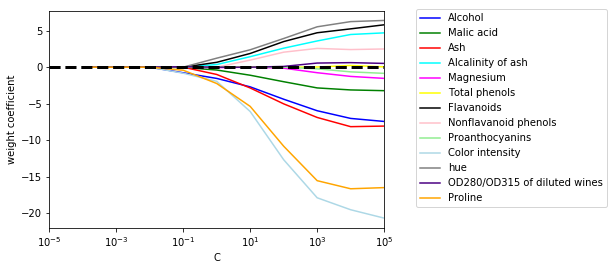

In [28]:
# visualizing increasing L1 regularization
fig, ax = plt.subplots()

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr=LogisticRegression(penalty='l1',
                          C=10.**c,
                          multi_class='auto',
                          solver='liblinear')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column+1],
             color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1,
          fancybox=True)
plt.show()

# Sequential Feature Selection Algorithms

In [52]:
# implementing Sequential Backward Selection (SBS) algorithm
# this eliminates the feature which casues the least performance loss at each stage

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator=estimator
        self.k_features=k_features
        self.test_size=test_size
        self.random_state = random_state
        self.scores_ = []
        self.k_score_ = []
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=self.random_state, 
                                                    test_size=self.test_size)
        dim = X_train.shape[1]
        self.indices_= tuple(range(dim))
        self.subsets_ = [self.indices_]
        
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test,
                                 self.indices_)
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                 X_test, y_test,
                                 p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train,
                                 X_test, y_test,
                                 indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=2)
sbs.fit(X_train_std, y_train)

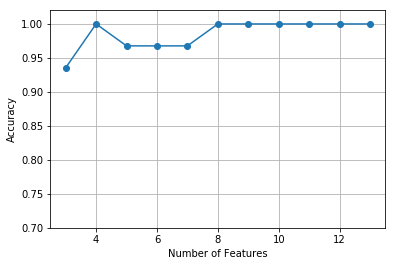

In [54]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat[:-1], sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()
plt.show()

# Assessing Feature Importance With Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


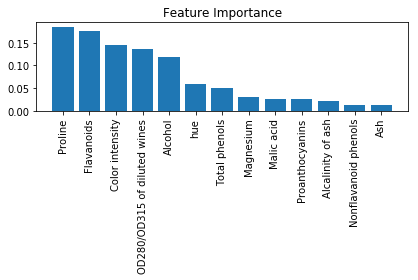

In [68]:
# training random forest classifier on the wine dataset to determine most
# important features
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range (X_train.shape[1]):
    print ("%2d) %-*s %f" % (f + 1, 30, 
                         feat_labels[indices[f]],
                         importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],
           rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [69]:
# scikit learn also has a feature selection process that can be built into a model pipeline
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

print ('Number of features that meet this threshold criteria:', X_selected.shape[1])

for f in range (X_selected.shape[1]):
    print ("%2d) %-*s %f" % (f + 1, 30, 
                         feat_labels[indices[f]],
                         importances[indices[f]]))

Number of features that meet this threshold criteria: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
